# Monte Carlo Simulation

## Introduction to Monte Carlo Simulation
Monte Carlo Method is probably the most famous tool for simulation. In this first part of the module we will learn about Monte Carlo history, we will understand the difference between Monte Carlo methods and Monte Carlo simulation, we will integrate the different steps in a Monte Carlo simulation and finally we will carry on a Monte Carlo simulation experiment to estimate the Pi number.

There were several approaches to the Monte Carlo method in the early 20th century, but it was in the mid-1940s during the Manhattan Project at “Los Alamos” that this method was first intentionally developed by Stanislaw Ulam and John von Neumann for early work relating to the development of nuclear weapons.

Below you can read a quote from Stanislaw Ulam in which he explains how he came up with this simple but powerful method:

"The first thoughts and attempts I made to practice [the Monte Carlo Method] were suggested by a question which occurred to me in 1946 as I was convalescing from an illness and playing solitaires. 
The question was what are the chances that a Canfield solitaire laid out with 52 cards will come out successfully? After spending a lot of time trying to estimate them by pure combinatorial calculations, I wondered whether a more practical method than “abstract thinking” might not be to lay it out say one hundred times and simply observe and count the number of successful plays... This was already possible to envisage with the beginning of the new era of fast computers, and I immediately thought of problems of neutron diffusion and other questions of mathematical physics, and more generally how to change processes described by certain differential equations into an equivalent form interpretable as a succession of random operations. Later [in 1946], I described the idea to John von Neumann, and we began to plan actual calculations."

Being secret, the work of von Neumann and Ulam required a code name. A colleague of von Neumann and Ulam, Nicholas Metropolis, suggested using the name Monte Carlo, which refers to the Monte Carlo Casino in Monaco where Ulam’s uncle would borrow money from relatives to gamble.

The definition of the Monte Carlo concept can be a bit confusing. For this reason, we will take Sawilowsky’s example and distinguish between: Simulation, Monte Carlo method and Monte Carlo simulation.

* A **Simulation** is a fictitious representation of reality. For example: Drawing one pseudo-random uniform variable from the interval [0,1] can be used to simulate the tossing of a coin. If the value is less than or equal to 0.50 designate the outcome as heads, but if the value is greater than 0.50 designate the outcome as tails. This is a simulation, but not a Monte Carlo simulation.
* A **Monte Carlo method** is a technique that can be used to solve a mathematical or statistical problem. For example: Pouring out a box of coins on a table, and then computing the ratio of coins that land heads versus tails is a Monte Carlo method of determining the behavior of repeated coin tosses, but it is not a simulation.
* A **Monte Carlo simulation** uses repeated sampling to obtain the statistical properties of some phenomenon (or behavior). For example: drawing a large number of pseudo-random uniform variables from the interval [0,1] at one time, or once at many different times, and assigning values less than or equal to 0.50 as heads and greater than 0.50 as tails, is a Monte Carlo simulation of the behavior of repeatedly tossing a coin.

The main idea of this method is that a phenomenon is simulated multiple times on a computer by generating random numbers and the results are aggregated to provide statistical summaries associated with the phenomenon. Sawilowsky lists the characteristics of a high-quality Monte Carlo simulation:

* The (pseudo-random) number generator has certain characteristics (e.g. a long “period” before the sequence repeats)
* The (pseudo-random) number generator produces values that pass tests for randomness
* There are enough samples to ensure accurate results
* The algorithm used is valid for what is being modeled
* It simulates the phenomenon in question

## Steps in a Monte Carlo Simulation

Monte Carlo methods vary, but tend to follow a particular pattern:
1. Define a domain of possible inputs
2. Generate inputs randomly from a probability distribution over the domain
3. Perform a deterministic computation on the inputs
4. Aggregate the results

To better understand how Monte Carlo simulation works we will develop a classic experiment: The $\pi$ number estimation.

## The $\pi$ number estimation

$\pi$ is the mathematical constant, which is equal to $3.14159265…$, defined as the ratio of a circle’s circumference to its diameter:

$$
\pi = \dfrac{C}{d}
$$

The number $π$ appears in many formulas across mathematics and physics. It is an irrational number, meaning that it cannot be expressed exactly as a ratio of two integers, although fractions such as $\tfrac{22}{7}$ are commonly used to approximate it. Consequently, its decimal representation never ends, nor enters a permanently repeating pattern. It is a transcendental number, meaning that it cannot be a solution of an equation involving only sums, products, powers, and integers.

The invention of calculus soon led to the calculation of hundreds of digits of π, enough for all practical scientific computations. Nevertheless, in the 20th and 21st centuries, mathematicians and computer scientists have pursued new approaches that, when combined with increasing computational power, extended the decimal representation of π to many trillions of digits. A very common computational way to calculate it is through Monte Carlo Simulation. Let's see some considerations for the experiment (figure below):

![img](https://drive.google.com/uc?id=14ErgZCgtAC_DWcn6q7Yg4F02uvM7a3er)

* Consider a circle with radius $r = 1$, which is fixed and known. 
* Imagine that this circle is circumscribed within a square, which therefore has side 2r (also equal to the diameter).

**What is the probability that if I choose a random point inside the square, it will also be inside the circle?** If I choose any random point within the square, it can be inside the circle or just inside the square. A very simple way to compute this probability is the ratio between the area of the circle and the area of the square.

$$
P(\text{point inside the circle}) = \dfrac{\text{area of the circle}}{\text{area of the square}} = \dfrac{\pi r^2}{2r \cdot 2r} = \dfrac{\pi}{4}
$$

The probability that a randomly selected point in the square is in the circle is $\tfrac{\pi}{4}$. This means that if I were to replicate the selection of a random point in the square a large number of times, I could **count the proportion of points inside the circle, multiply it by four and that would give me an approximation of $\pi$.**

We will create a Monte Carlo experiment in Python which implements the ideas above. We will carry out the experiment in 5 steps:

1. Generate 2 random numbers between 0 and 1 in total 100 times (x and y). We will only use the upper-right square of the circle to siplify the experiment (figure below).
2. Calculate x2 + y2 (This is the point in the space).
  * If the value is less than 1, the case will be inside the circle
  * If the value is greater than 1, the case will be outside the circle.

3. Calculate the proportion of points inside the circle and multiply it by four to approximate the $π$ value.
4. Repeat the experiment a thousand times, to get different approximations to $π$.
5. Calculate the average of the previous 1000 experiments to give a final value estimate.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Pi_30K.gif/156px-Pi_30K.gif)

### Step 1: Generation of pseudo-random numbers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math

In [ ]:
np.random.seed(2023)

nPoints = 100
x = np.random.uniform(0,1,nPoints)
y = np.random.uniform(0,1,nPoints)
print(x[0:9].round(3))
print(y[0:9].round(3))

[0.322 0.89  0.588 0.127 0.141 0.468 0.022 0.727 0.524]
[0.878 0.519 0.68  0.436 0.972 0.365 0.623 0.258 0.681]


If we plot the values in the given space, we can see that some of the points in the space are going to be inside the circle and some others will not

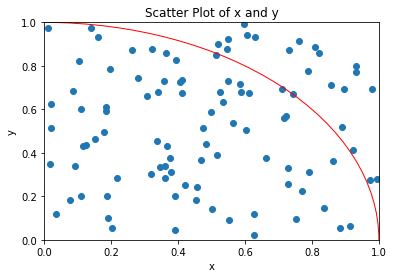

In [ ]:
plt.scatter(x, y)
circle = plt.Circle((0, 0), 1, color='red', fill=False)
plt.gca().add_artist(circle)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Scatter Plot of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Step 2: Calculate the circumference equation

Calculate the circumference equation

* If the value is less than 1, the case will be inside the circle
* If the value is greater than 1, the case will be outside the circle.

In [ ]:
def circum(x,y):
  result = []
  for i in range(len(x)):
    point = x[i]**2 + y[i]**2
    if(point<=1):
      result.append(True)
    else:
      result.append(False)
  return(result)

In [ ]:
sim_points = circum(x,y)
print(sim_points[0:9])

[True, False, True, True, True, True, True, True, True]


### Step 3: Estimate $\pi$ number

So using our 100 simulated points, we came up with an approximation of $3.2$ for the value of $π$. 

In [ ]:
pi_val = 4*sum(sim_points)/nPoints
print(pi_val)

3.16


Of course this number depends on the random numbers that were generated. If we were to repeat it (without using the seed), we would get a different approximation.

### Step 4: Replicate the experiment

Now that we know how to approximate the $\pi$ number we can replicate the experiment N times to perform a monte carlo simulation and obtain a better result. We will use a single function for doing this:

In [ ]:
def pi_val_func(nPoint=100):
  x = np.random.uniform(0,1,nPoints)
  y = np.random.uniform(0,1,nPoints)
  values = []
  for i in range(len(x)):
    point = x[i]**2 + y[i]**2
    if(point<=1):
      values.append(True)
    else:
      values.append(False)
  pi_val = 4*sum(values)/nPoints
  return(pi_val)

In [ ]:
np.random.seed(2022)
pi_val_func()

2.88

Now we can replicate this experiment any number of times (e.g., 1000 times) to obtain different measures of the $\pi$ number.

In [ ]:
def replicate_pi(n_replicas = 1000, nPoints = 100):
  replicas = []
  for i in range(n_replicas):
    replicas.append(pi_val_func(nPoints))
  return(np.array(replicas))

In [ ]:
np.random.seed(2023)
pi_numbers = replicate_pi()
print(pi_numbers[0:9])

[3.16 3.36 2.64 3.04 3.4  3.04 3.16 3.2  3.08]


### Step 5: Aggregate the results

Finally, in order to obtain a accurate result of the experiment, we can aggregate those results using the average $\pi$ number.

In [ ]:
pi_numbers.mean()

3.1427599999999996

Other ways to summarize the results is to plot the resulting vector. In this case, a boxplot can summarize the information of the experiment very well.

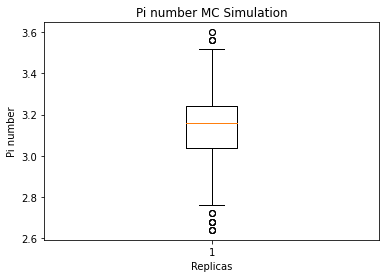

In [ ]:
plt.boxplot(pi_numbers)
plt.xlabel("Replicas")
plt.ylabel("Pi number")
plt.title("Pi number MC Simulation")
plt.show()

The boxplot tells us two important things:
* if we were to take the average of the 1,000 approximations of π as the value of π, we would get a value very close to the actual value (see the horizontal line inside the box).
* if we were to choose a value for π based on a single simulation, then we could choose values between 2.6 and 3.6.

One thing you might wonder now is the following. Why did we replicate the experiment 1000 times and each time took only 100 points. Could have we not taken a much larger number of points only once (for example 1000×100)?

On one hand that would have clearly given us a good approximation, using the same total number of simulated points. 




In [ ]:
replicate_pi(100*1000).mean()

3.1420184000000004

However this approach does not give us any information about uncertainty or about how good our approximation is. We have just one single value. On the other hand, using replication we have 1000 possible approximations of π and we can construct confidence intervals of plausible values. For instance, we would believe that the true value π  is with 95% probability in the interval which includes 95% of the central approximations of π. 

### Additional Step: extending our knowledge

We can store the results of the experiment increasing the number of points and replicas to plot the optimization function of the $\pi$ number estimation.

In [ ]:
def optim_func_pi(max_nPoints, max_Replicas, n_repetitions):

  nPoints_sequence = np.linspace(100,max_nPoints,n_repetitions).round(0)
  replicas_sequence = np.linspace(1000,max_Replicas,n_repetitions).round(0)
  pi_averages = []

  for i in range(n_repetitions):
    print("Starting the estimation ", i, " out of ", n_repetitions)
    pi_vector = replicate_pi(int(nPoints_sequence[i]), int(replicas_sequence[i]))
    pi_averages.append(pi_vector.mean())
  
  return(pi_averages)

In [ ]:
results = optim_func_pi(5000,10000,100) # do not run this line, takes a while

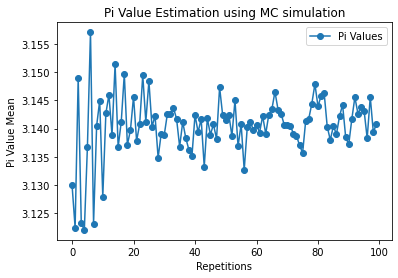

In [ ]:
results_arr = np.array(results)
plt.plot(results_arr, 'o-', label = 'Pi Values')
plt.legend()
plt.title('Pi Value Estimation using MC simulation')
plt.xlabel('Repetitions')
plt.ylabel('Pi Value Mean')
plt.show()

## The `choice` function

We have carried out our first Monte Carlo experiment. We will carry out others in the rest of this chapter and interpret their results. There is one function, the `choice` function which we will often use. 

In the previous chapter we discussed how to simulate numbers distributed according to a specific random variable. One possible class of numbers we may want to simulate in some situations are integers. Suppose for example you want to simulate a dice game: then we must be able to simulate in Python a number of the set {1, 2, 3, 4, 5, 6} where each has the same probability of appearing.

For this specific purpose we have choice function. This takes four inputs:
* `a`: an array of values we want to sample from.
* `size`: the size of the sample we want.
* `replace`: if True sampling is done with replacement. That is if a value has been selected, it can be selected again. By default equal to False.
* `p`: an array of the same length of a giving the probabilities that the elements of a are selected. By default equal to a uniform probability.

So, for example, if we wanted to simulate ten tosses of a fair dice we can write:

In [ ]:
np.random.seed(2023)
np.random.choice(a = [1,2,3,4,5,6], size = 10, replace = True)

array([2, 2, 5, 4, 5, 5, 6, 1, 2, 6])

Notice that the vector `a` does not necessarily needs to be numeric. It could be a vector of characters. For example, let’s simulate the toss of 7 coins, where the probability of heads is $2/3$ and the probability of tails is $1/3$.

In [ ]:
np.random.seed(2023)
np.random.choice(a = ["heads", "tails"], size = 7, replace = True, p = [2/3, 1/3])

array(['heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'heads'],
      dtype='<U5')

## A game of chance

In this case we will simulate a little game of chance.

Peter and Paul play a simple game that consists of repeatedly tossing a fair coin. On a given toss, if it comes up heads, Peter wins 1 euro from Paul; otherwise, if it comes up tails, Peter gives 1 euro to Paul. Peter starts with zero euros, let's simulate the game for 50 tosses and see how lucky he is.

We can simulate this game using the Python `choice()` function. Peter’s winning on a particular toss will be 1€ or -1€ with equal probability. His winnings on 50 repeated tosses can be considered to be a sample of size 50 selected with replacement from the set {1€, -1€}.

In [ ]:
np.random.seed(2023)
win = np.random.choice(a = [-1,1], size = 50, replace = True)
print(win[0:9])

[ 1  1 -1  1  1 -1  1 -1 -1]


For this particular game Peter won the first game, then won the second, lost the third and won the fourth…

Suppose Peter is interested in his cumulative winnings as he plays this game. The function `np.cumsum()` computes the cumulative winnings of the individual values and we store the cumulative values in a vector named `cumul_win`.

In [ ]:
cumul_win = np.cumsum(win)
print(cumul_win[0:9])

[1 2 1 2 3 2 3 2 1]


So at the end of this specific game Peter won 6€. The figure below reports Peter’s fortune as the game evolved. 

In [ ]:
cumul_win[len(cumul_win)-1]

6

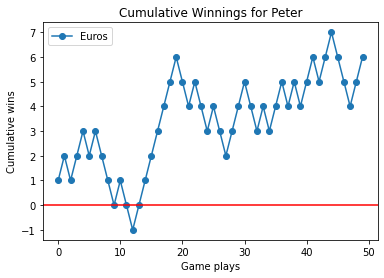

In [ ]:
cumul_win = np.array(cumul_win)
plt.plot(cumul_win, 'o-', label = 'Euros')
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Cumulative Winnings for Peter')
plt.xlabel('Game plays')
plt.ylabel('Cumulative wins')
plt.show()

Of course this is the result of a single simulation and the outcome may be totally different than the one we saw. The next figure reports four simulated games: we can see that in the first one Peter wins, in the second he loses, ...

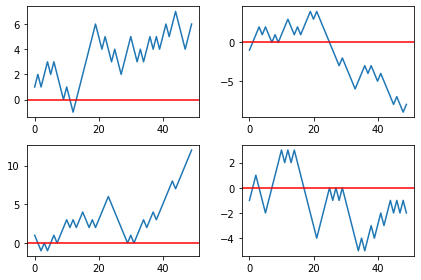

In [ ]:
np.random.seed(2023)
fig, axs = plt.subplots(2, 2)

cumul_win = np.array(np.cumsum(np.random.choice(a = [-1,1], size = 50, replace = True)))
axs[0, 0].plot(cumul_win, '-')
axs[0, 0].axhline(y=0, color='r', linestyle='-')

cumul_win = np.array(np.cumsum(np.random.choice(a = [-1,1], size = 50, replace = True)))
axs[1, 0].plot(cumul_win, '-')
axs[1, 0].axhline(y=0, color='r', linestyle='-')

cumul_win = np.array(np.cumsum(np.random.choice(a = [-1,1], size = 50, replace = True)))
axs[0, 1].plot(cumul_win, '-')
axs[0, 1].axhline(y=0, color='r', linestyle='-')

cumul_win = np.array(np.cumsum(np.random.choice(a = [-1,1], size = 50, replace = True)))
axs[1, 1].plot(cumul_win, '-')
axs[1, 1].axhline(y=0, color='r', linestyle='-')

fig.tight_layout()

Suppose we are interested in the following question.

**What is the probability that Peter breaks even at the end of the game?**

Evidently we cannot cannot answer by simply looking at the outputs of the previous simulations. We need to do a formal Monte Carlo study. In this type of experiment, we simulate the random process and compute the statistic of interest. By repeating the random process many times, we obtain a collection of values of the statistic, which can then be used to approximate probabilities or expectations that answer the questions.

As you may recall from the estimation of $π$ experiment, we first need to write a function that simulates the experiment. In particular we need to write a function which outputs Peter’s winning at the end of the game. To make this function more general, we define `n` to be the number of tosses and let the default value of `n` be 50.

In [ ]:
def peter_paul(n = 50):
  return(sum(np.random.choice(a = [-1,1], size = 50, replace = True)))

In [ ]:
np.random.seed(2023)
peter_paul()

6

The output is the same as the previous code, so it seems that our function works correctly.

Let’s replicate the experiment many times.

In [ ]:
def peter_paul_rep(replicas = 1000, n = 50):
  results = []
  for i in range(replicas):
    results.append(peter_paul(n))
  return(results)

In [ ]:
np.random.seed(2023)
experiment = peter_paul_rep()
experiment[:9]

[6, 12, -8, -2, 12, 0, 2, -2, 4]

In [ ]:
import pandas as pd
experiment = pd.Series(sorted(experiment))
experiment_df = pd.DataFrame(experiment.value_counts(sort = False).rename_axis('values').reset_index(name='counts'))
experiment_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
values,-20,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20
counts,1,7,17,35,44,45,69,99,109,109,109,91,76,73,45,27,22,12,8,2


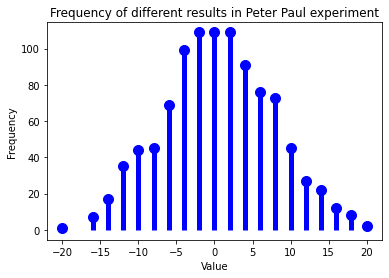

In [ ]:
plt.vlines(experiment_df["values"], 0, experiment_df["counts"], colors='b', lw=5)
plt.plot(experiment_df["values"], experiment_df["counts"], 'bo', markersize=10)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Frequency of different results in Peter Paul experiment")
plt.show()

**What is the probability that Peter breaks even at the end of the game?**

So we can see that Peter breaks even 109 out of 1000 times. Furthermore the plot shows us that most commonly Peter will win/lose little money and that big wins/losses are unlikely.

To conclude our experiment we need to calculate our estimated probability of Peter breaking even. Clearly this is equal to $109/1000= 0.109$. In Python:

In [ ]:
sum(experiment == 0)/1000

0.109

Notice that we could have also answered this question exactly. The event Peter breaking even coincides with a number of successes $n/2$ in a Binomial experiment with parameters `n=50` and `p=0.5`. This can be computed in Python as:

In [ ]:
from scipy import stats
stats.binom.pmf(k = 25, n = 50, p = 0.5)

0.112275172659217

## Monte Carlo for Inference

Monte Carlo Simulation is a very useful tool when we want to make inferences about real world scenarios. In this second part of the module we will learn one of the most useful uses of Monte Carlo Simulation, that is Monte Carlo for Inference.

In statistical inference there is uncertainty in any estimate. The methods we are going to see use repeated sampling from a given probability model, known as parametric bootstrap. We simulate the stochastic process that generated the data, repeatedly drawing samples under identical conditions.

To infer means to draw a general conclusion from particular facts. Statistical inference is a set of methods and techniques that allow us to deduce characteristics of a population using data from a random sample. The method we are going to use the most to infer is the parameter estimation method.
We estimate parameters of a population from a sample because we will rarely have access to all the data of the population. Such is the case of election surveys, disease studies, etc. in empirical studies.

### How can we use Monte Carlo for Inference?

We have already used Monte Carlo for Inference in the previous section. Monte Carlo Simulation will allow us to infer general conclusions by replicating an experiment and calculating parametrized statistics. We did infer the probability of Peter breaking even after 50 games, but as we have learned, this probability can be calculated with the Binomial distribution. Now we will see some more examples in which we can only approximate the solution to infer the result.

We will try to answer to the following questions:
* How often Peter will be on the lead?
* What is the maximum possible fortune for Peter during the game?
* What will be value of Peter’s fortune at the end?

We can add additional lines of code to our function `peter_paul` to compute several statistics of interest in our experiment. To answer our questions, we focus on the final fortune `F`, the number of times Peter is in the lead `L`, and the maximum cumulative winning `M`. The output of the function is a list consisting of the values of `F`, `L`, and `M`.

In [ ]:
def peter_paul(n = 50):
  win = np.random.choice([-1,1],n,True)
  cumul_win = np.cumsum(win)
  results = [sum(win), sum(cumul_win > 0), max(cumul_win)]
  return(np.array(results))


In [ ]:
np.random.seed(2023)
peter_paul()

array([ 6, 46,  7])

Now that we have defined all the parameters to estimate in our experiment, the next step will be to replicate the experiment. Since the output of peter_paul is a vector, S will be a matrix of 3 columns and 1000 rows, where the columns correspond to the simulated draws of F, L, and M. We can verify the dimension of the matrix of S using the `shape` attribute.

In [ ]:
def peter_paul_rep(n_replicas = 1000, n = 50):
  results = np.zeros((n_replicas,3))
  for i in range(n_replicas):
    exp = peter_paul(n)
    results[i,] = exp
  return(results)

In [ ]:
S = peter_paul_rep()
S.shape

(1000, 3)

**How many times Peter in the lead?** The likely answer to this question (we do not know for sure) is in the `L` column (the second). We will create the `times_in_lead` variable with all the values and print the first 10.

In [ ]:
times_in_lead = S[:,1]
print(times_in_lead[:9])

[16.  5.  1.  0.  2.  0. 48. 31. 30.]


We can use the same strategy as for the Peter final fortune and plot the value counts.

In [ ]:
times_in_lead_df = pd.Series(sorted(times_in_lead))
times_in_lead_df = pd.DataFrame(times_in_lead_df.value_counts(sort = False).rename_axis('values').reset_index(name='counts'))
times_in_lead_df.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
values,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
counts,124.0,56.0,30.0,28.0,22.0,15.0,9.0,12.0,12.0,14.0,...,17.0,23.0,23.0,18.0,20.0,19.0,26.0,37.0,25.0,58.0


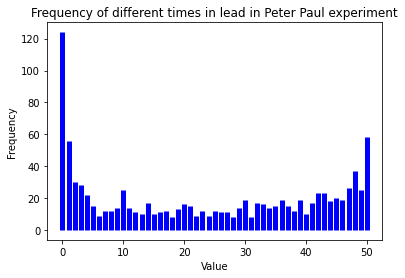

In [ ]:
plt.vlines(times_in_lead_df["values"], 0, times_in_lead_df["counts"], colors='b', lw=5)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Frequency of different times in lead in Peter Paul experiment")
plt.show()

In this case can be also useful to understand the results to use the proportions for each value in `times_in_lead` to understand them better:

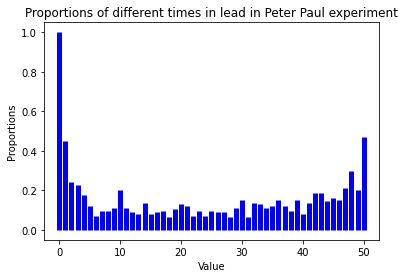

In [ ]:
times_in_lead_df["prop"] = times_in_lead_df["counts"]/max(times_in_lead_df["counts"])
plt.vlines(times_in_lead_df["values"], 0, times_in_lead_df["prop"], colors='b', lw=5)
plt.xlabel("Value")
plt.ylabel("Proportions")
plt.title("Proportions of different times in lead in Peter Paul experiment")
plt.show()

Finally, we can compute some statistics of this variable from the S matrix:

In [ ]:
pd.DataFrame(S)[1].describe()

count    1000.000000
mean       23.454000
std        18.089475
min         0.000000
25%         4.000000
50%        23.000000
75%        41.000000
max        50.000000
Name: 1, dtype: float64

**How many times Peter in the lead?**

We can not ensure this result, but we can say that is more likely for Peter to be all the time or never in the lead than middle situations. We can also say that the average of times in the lead for Peter is 23 out of 50.

**What is the maximum possible fortune for Peter during the game?**

Let’s consider the distribution of `M`, Peter’s maximum winning during the 50 plays. We store the 1000 simulated values of `M` in the variable `maximum_lead` and extract some valuable information as before:

In [ ]:
maximum_lead = S[:,2]

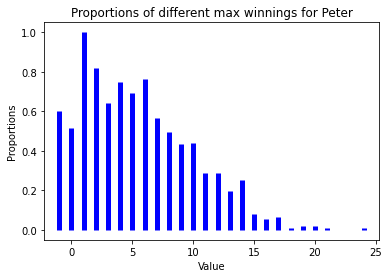

In [ ]:
maximum_lead_df = pd.Series(sorted(maximum_lead))
maximum_lead_df = pd.DataFrame(maximum_lead_df.value_counts(sort = False).rename_axis('values').reset_index(name='counts'))
maximum_lead_df["prop"] = maximum_lead_df["counts"]/max(maximum_lead_df["counts"])
plt.vlines(maximum_lead_df["values"], 0, maximum_lead_df["prop"], colors='b', lw=5)
plt.xlabel("Value")
plt.ylabel("Proportions")
plt.title("Proportions of different max winnings for Peter")
plt.show()

In [ ]:
pd.DataFrame(S)[2].describe()

count    1000.000000
mean        5.374000
std         4.490243
min        -1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        24.000000
Name: 2, dtype: float64

We can tell Peter that the maximum winnings he can have is 24€, so it could be a good idea to end the game if he can at that point. We can also tell him that 75% of the games his maximum winnings are of 8€, 5€ in 50% of them, and 2€ in 25%, so those are also good and safer options to end the game. On average the maximum winning for Peter during the game is of 5.37€.

**What will be value of Peter’s fortune at the end?**

Finally, we can estimate Peter's most likely final fortune in order to add more information to the game.

We will compute the same plots and statistics:

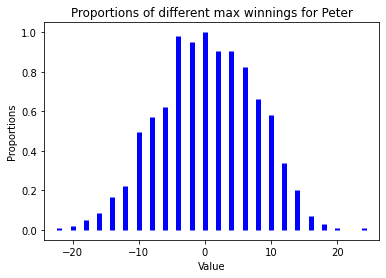

In [ ]:
final_fort = S[:,0]
final_fort_df = pd.Series(sorted(final_fort))
final_fort_df = pd.DataFrame(final_fort_df.value_counts(sort = False).rename_axis('values').reset_index(name='counts'))
final_fort_df["prop"] = final_fort_df["counts"]/max(final_fort_df["counts"])
plt.vlines(final_fort_df["values"], 0, final_fort_df["prop"], colors='b', lw=5)
plt.xlabel("Value")
plt.ylabel("Proportions")
plt.title("Proportions of different max winnings for Peter")
plt.show()

In [ ]:
pd.DataFrame(S)[0].describe()

count    1000.000000
mean        0.360000
std         7.289138
min       -22.000000
25%        -4.000000
50%         0.000000
75%         6.000000
max        24.000000
Name: 0, dtype: float64

As we have seen previously in this Notebook, being this a game of chance, the most likely final fortune is around 0€.


## Sleepless in Seattle Experiment

Sleepless in Seattle is a 1993 American Romantic Comedy. Annie and Sam are supposed to meet on top of the Empire State Building where they would at last meet. However, their arrival time depends on a variety of factors and may actually not coincide and therefore never fall in love.

Now, let  `A`  and `S`  represent Annie´s and Sam’s arrival times at the Empire State Building, where we measure the arrival time as the number of hours after noon. We assume:
* `A` and `S` are independent and uniformly distributed. That is, `A` and `S` are random variables symbolizing the arrival time of Annie and Sam, respectively.
* Annie arrives somewhere between 10:30 and midnight
* Sam arrives somewhere between 10:00 and 11:30PM.

Our Questions are:
* What is the probability that Annie arrives before Sam?
* What is the expected difference in arrival times?
* If they each wait only twenty minutes after their arrival, what is the probability that they meet?
* How much should they wait (assuming they wait the same amount of time), so that the probability they meet is at least 50%?

We start simulating a large number of values from distribution of  `(A,S)` say, 1000, where `A` and `S` are independent:

In [ ]:
np.random.seed(2023)
sam = np.random.uniform(10,11.5,1000)
annie = np.random.uniform(10.5, 12, 1000)

**What is the probability that Annie arrives before Sam?**

The following function outputs `True` if Annie arrives before Sam and `False` otherwise.

In [ ]:
def sam_annie_1():
  sam = np.random.uniform(10,11.5,1)
  annie = np.random.uniform(10.5, 12, 1)
  return(annie < sam)

If we run a single simulation, for instance:

In [ ]:
np.random.seed(2023)
sam_annie_1()

array([False])

We see that Annie does not arrive before Sam.

We can simply adapt `sam_annie_1` to use 1000 random observations and give an estimate of this probability.



In [ ]:
def sam_annie_1():
  sam = np.random.uniform(10,11.5,1000)
  annie = np.random.uniform(10.5, 12, 1000)
  return(sum(annie < sam)/1000)

In [ ]:
np.random.seed(2023)
sam_annie_1()

0.226

We can even replicate the experiment 1000 times to get a sampling distribution and have an estimate of the variability around this probability.

In [ ]:
def sam_annie_1_rep(replicas=1000):
  results = []
  for i in range(replicas):
    results.append(sam_annie_1())
  return(np.array(results))

In [ ]:
np.random.seed(2023)
experiment_1 = sam_annie_1_rep()

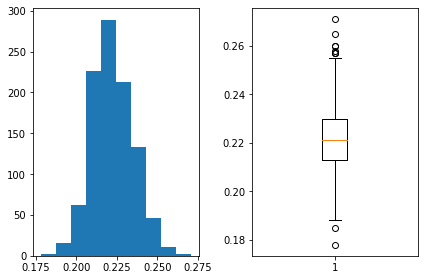

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(experiment_1)
axs[1].boxplot(experiment_1)
fig.tight_layout()

It seems that the average probability that Annie arrives before Sam is around 0.22.

**What is the expected difference in arrival time?**

The function `sam_annie_2` computes this expectation using 1000 random observations.

In [ ]:
def sam_annie_2():
  sam = np.random.uniform(0,90,1000)
  annie = np.random.uniform(30, 120, 1000)
  return((sam-annie).mean())

In [ ]:
np.random.seed(2023)
sam_annie_2()

-29.33070515057468

We can replicate and plot the results.

In [ ]:
def sam_annie_2_rep(replicas=1000):
  results = []
  for i in range(replicas):
    results.append(sam_annie_2())
  return(np.array(results))
np.random.seed(2023)
experiment_2 = sam_annie_2_rep()

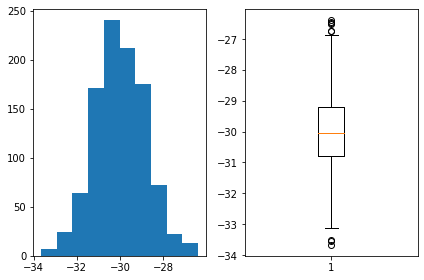

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(experiment_2)
axs[1].boxplot(experiment_2)
fig.tight_layout()

So on average Sam arrives 30 minutes before Annie.

**If they each wait only twenty minutes after their arrival, what is the probability that they meet?**

The function `sleepless` below returns `True` if Annie and Sam meets,`False` otherwise.

In [ ]:
def sleepless(waiting = 20):
  sam = np.random.uniform(0,90,1)[0]
  annie = np.random.uniform(30, 120, 1)[0]
  if sam < annie:
    if sam + waiting > annie:
      return(True)
  elif annie + waiting > sam:
    return(True)
  return(False)

In [ ]:
np.random.seed(2023)
sleepless()

False

Let’s run it 10.000 times to get an estimate of the probability.

In [ ]:
def sleepless_rep(replicas=10000, waiting = 20):
  results = []
  for i in range(replicas):
    results.append(sleepless(waiting))
  return(np.array(results))
np.random.seed(2023)
experiment_3 = sleepless_rep()

In [ ]:
pd.Series(experiment_3).value_counts()

False    7135
True     2865
dtype: int64

In [ ]:
experiment_3.mean()

0.2865

So we see that if they each wait 20 minutes, they have a probability of meeting around 0.2865.

In [ ]:
np.random.seed(2023)
results = []
for i in range(20,61):
  np.array(results.append(sleepless_rep(waiting=i).mean()))

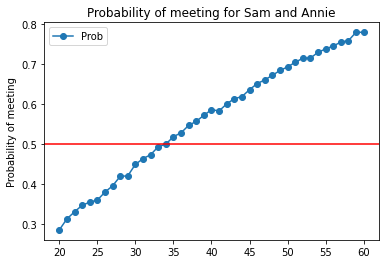

In [ ]:
plt.plot( np.array(list(range(20,61))), results, 'o-', label = 'Prob')
plt.legend()
plt.axhline(y=0.5, color='r', linestyle='-')
plt.title('Probability of meeting for Sam and Annie')
plt.ylabel('Probability of meeting')
plt.show()

From the plot, we can interpret that a waiting time of 35 minutes or more is enough for meeting in at least the 50% of the cases.

## The Taxi problem experiment

Imagine that a person is walking through the streets of a city and notices the following numbers of 5 taxis (n = 5) that pass by: 34,100,65,81,120. 

Can he/she make an intelligent guess at the number of taxis in the city?: Is a problem of statistical inference where population is the collection of taxis driven in the city and one wishes to know the value of N (total number of taxis).

Assume taxis are numbered from 1 to N, each equally likely to be observed and consider two possible estimates:

* The largest taxi number observed.
* Twice the sample mean.

The distribution of cabs will therefore be a uniform distribution of discrete values. The values range from 1 to 100 (identifying number of each cab) and each and every one of them has the same probability of appearing (0.01).

**The largest taxi number observed**

With the information we have, a sample of 5 taxis, this estimator is not going to be very reliable. However, imagine that this person sees 5 taxis every day, for 1000 days. In this case, it is more likely that the taxi with the highest number of all the taxis that this person has seen coincides with N, since the total number of taxis N will be equal to the number of the taxi with the highest number.
For example, if there are 100 taxis in total (N = 100), the number of the taxi with the highest number will be 100 → N = highest number.


**Twice the sample mean**

Taking into account the previously mentioned discrete uniform distribution, the mean in the case of 100 cabs in total will be 50.5, but since the identifiers of each cab are integers, it will be 50, so → $𝝁 = 50$, and, therefore $2𝝁 = 100 = N$

As you have already seen in Fundamentals of Data Analysis, the best estimator of the population mean $𝝁$ is the sample mean $\bar{X}$, so the best estimator for N using the information of the sample, will be → $2\bar{X}$.

The problem here is that we don't know that N = 100, so we don't really know which of the two is the better estimate. To test this, let's simulate two sampling distributions and work with the expected value of each (mean) to see which of the two is less biased.

**Which is a better estimator of the number of taxis N?** We will compare these two estimators using a Monte Carlo Simulation:

1. Simulate taxi numbers from a uniform distribution with a known number of taxis N and compute the two estimates.
2. Repeat the simulation many times and obtain two empirical sampling distributions.
3. Then compare the two estimators by examining various properties of their respective sampling distributions.

The `taxi()` function will implement a single simulation. We have two arguments:
* The actual number of taxis `N`.
* The sample size `n`.

In [ ]:
def taxi(N,n):
  x = np.random.choice(np.arange(1,N+1), n, True)
  estimate1 = max(x)
  estimate2 = x.mean()*2
  return([estimate1, estimate2])

 Let’s say the actual number of taxis in city is 100 (N = 100) and we observe numbers of n=5 taxis.

In [ ]:
np.random.seed(2023)
taxi(100,5)

[88, 110.0]

We get values largestnumber= 88 and twicethemean= 110.0. Given this result it seems that two times the mean works better, but this is just one execution of the experiment, we have to replicate it.

Let’s simulate sampling process 1000 times. We are going to create a matrix with two columns (largestnumber and twicethemean), and 1000 rows. This rows will hold the estimated values of largestnumber and twicethemean for 1000 simulated experiments.

In [ ]:
def taxi_rep(replicas = 1000):
  results = np.zeros((replicas,2))
  for i in range(replicas):
    exp = taxi(100,5)
    results[i,] = exp
  return(results)

In [ ]:
np.random.seed(2023)
taxi_experiment = taxi_rep()

In [ ]:
taxi_experiment

array([[ 88. , 110. ],
       [ 97. , 133.6],
       [ 78. ,  88.4],
       ...,
       [ 97. , 135.6],
       [ 89. ,  90. ],
       [ 73. ,  50. ]])

In this way, we are simulating a thousand samples of 5 cabs each and obtaining the estimates of each one of them.
We are thus generating a sampling distribution of "largest number estimator" and another of "twice the mean estimator".

Here we are looking for “unbiasedness,” which means that the mean value of the estimator (expected) should be equal to the parameter. If we compare the estimators assuming that the value of N is 100:

In [ ]:
largestNumber = taxi_experiment[:,0]
twiceTheMean = taxi_experiment[:,1]
print("Largest Number: ", largestNumber.mean(), "\n", "Twice the Mean: ", twiceTheMean.mean())

Largest Number:  84.105 
 Twice the Mean:  100.9328


In the same way, we can calculate its margin of error (composed by the standard error and the z-value) to obtain a confidence interval and see which estimate is closer to the N parameter.

In [ ]:
se1 = largestNumber.std()/math.sqrt(1000)
se2 = twiceTheMean.std()/math.sqrt(1000)

In [ ]:
se2

0.8373506578250237

In [ ]:
CI_lower_LN = (largestNumber.mean() - (1.96*se1))
CI_upper_LN = (largestNumber.mean() + (1.96*se1))
print("Upper and Lower bounds for the Largest Number estimator are:", CI_lower_LN, "and", CI_upper_LN)

Upper and Lower bounds for the Largest Number estimator are: 83.22777359458348 and 84.98222640541653


In [ ]:
CI_lower_LN = (twiceTheMean.mean() - (1.96*se1))
CI_upper_LN = (twiceTheMean.mean() + (1.96*se1))
print("Upper and Lower bounds for the Largest Number estimator are:", CI_lower_LN, "and", CI_upper_LN)

Upper and Lower bounds for the Largest Number estimator are: 100.05557359458348 and 101.81002640541652


From the results, we can interpret that for both, the expected value estimation, and the error estimation, the second method works much better, giving a more precise prediction of the total number of taxis in the city, and having a lower variability in the estimation.

## Conclusions

Throughout this module we have learned how to carry out a simulation using Monte Carlo methods, and to make inferences from the results of the simulated experiments. The concepts acquired have been applied to concrete experiments, developing the steps of a Monte Carlo simulation in very different contexts. In the Lab of this module you will face problems with similar dynamics, but keep in mind that each Monte Carlo simulation is totally unique, and you will have to develop the code from scratch.